### Introduction

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.
Each row in the data provides relavant information about the patient.

# Importing Required Libraries

In [297]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Loading and Reading the Dataset

In [298]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [299]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [300]:
#These changes are intended to save memory
df['hypertension'] = df['hypertension'].astype('int32')
df['heart_disease'] = df['heart_disease'].astype('int32')
df['stroke'] = df['stroke'].astype('int32')
df['id'] = df['id'].astype('int32')
df['bmi'] = df['bmi'].astype('float32')

In [301]:
df.describe()   

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893177,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854062,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.099998,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.599998,1.000000


In [302]:
df.describe(include=object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# Cleaning the Dataset

In [303]:
#Cheking whether there are null values in the Dataset
missing_data = df.isnull().sum().to_frame().reset_index().rename({"index" : 'Variable', 0: 'Null Values'}, axis =1)
display(missing_data.style.background_gradient('gnuplot2_r'))

,Variable,Null Values
0,id,0
1,gender,0
2,age,0
3,hypertension,0
4,heart_disease,0
5,ever_married,0
6,work_type,0
7,Residence_type,0
8,avg_glucose_level,0
9,bmi,201


In [304]:
#Replaces the null values with the mean value in the bmi column
bmiMeanVal = df['bmi'].mean()
df['bmi'].fillna(value=bmiMeanVal, inplace = True)
df['bmi'] = df['bmi'].round(1)
display(df.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Null Values'}
                                                            , axis =1).style.background_gradient('copper_r'))

,Variables,Null Values
0,id,0
1,gender,0
2,age,0
3,hypertension,0
4,heart_disease,0
5,ever_married,0
6,work_type,0
7,Residence_type,0
8,avg_glucose_level,0
9,bmi,0


In [305]:
#Checking whether there are duplicates in the Dataset
print("Total number of duplicats in the dataset:" ,df.duplicated().sum())

Total number of duplicats in the dataset: 0


In [306]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893448,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698007,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.799999,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.799999,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.599998,1.000000


In [307]:
#Checking whether there are variables that do not match the format
uniqe_vals = [print(col , df[col].unique()) if df[col].dtypes == object else col for col in df ]

gender ['Male' 'Female' 'Other']
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [308]:
#Removing unknown gender from the Dataset
df.drop(df.loc[df['gender']=='Other'].index, inplace=True)
df.shape

(5109, 12)

In [309]:
#Resetting the index after removing the unusual category
df.reset_index(drop=True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.599998,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.900000,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400002,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.900000,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [310]:
#Removing the 'unknown' in smoking_status from the dataset
df.drop(df.loc[df['smoking_status']=='Unknown'].index, inplace=True)
df.shape

(3565, 12)

In [311]:
#Resetting the index after removing the unusual category
df.reset_index(drop=True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.599998,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.900000,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400002,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3560,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700001,never smoked,0
3561,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.900000,never smoked,0
3562,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
3563,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


#### Checking whether there are Negative values or zeroes

In [312]:
numerical_cols = [col for col in df if df[col].dtypes != object]
for col in numerical_cols:
    negative_values = df[df[col]<0]
negative_values    

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [313]:
df[df['age']==0]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [314]:
df[df['bmi']==0]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [315]:
df[df['avg_glucose_level']==0]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [316]:
#Handle unusual values in the age category
df['age'] = [age*100 if age < 0.1 else age*100 if age < 1 and age > 0.1 else age for age in df['age']]

# Analysis and visualization of the data

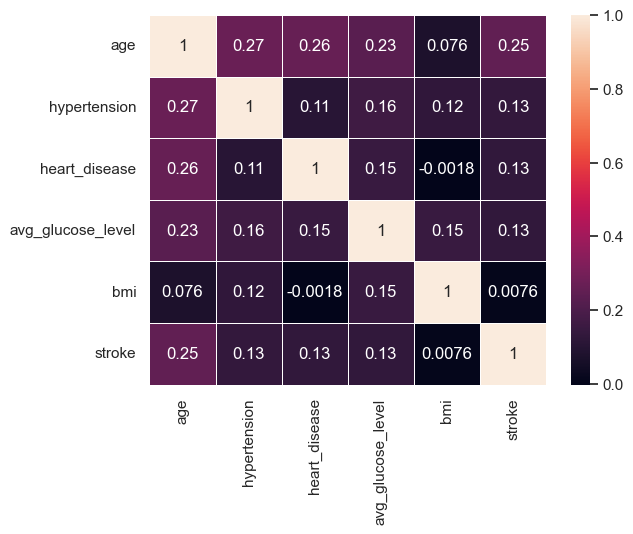

In [317]:
temp_df = df.drop(['id'], axis=1)
corr = temp_df.corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, annot=True, linewidths=0.5)
plt.show()

In [318]:
pd.DataFrame(df.groupby('stroke')['stroke'].count())

,stroke
stroke,
0,3363
1,202


The distribution of hypertension in the dataset is:
0    3119
1     446
Name: hypertension, dtype: int64


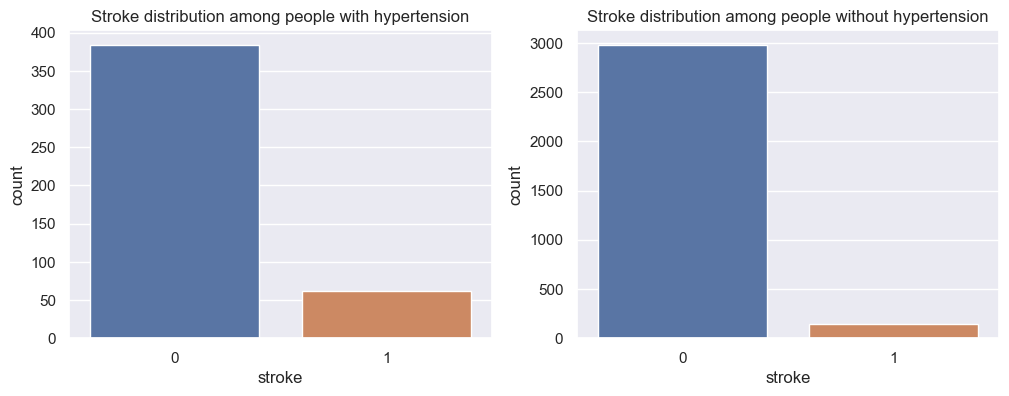

In [319]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.countplot(ax=ax[0], data=df[df.hypertension == 1], x='stroke').set(
    title="Stroke distribution among people with hypertension")
sns.countplot(ax=ax[1], data=df[df.hypertension == 0], x='stroke').set(
    title="Stroke distribution among people without hypertension")
print('The distribution of hypertension in the dataset is:')
print(df['hypertension'].value_counts())
plt.show()

The distribution of smoking status in the dataset is:
never smoked       1892
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


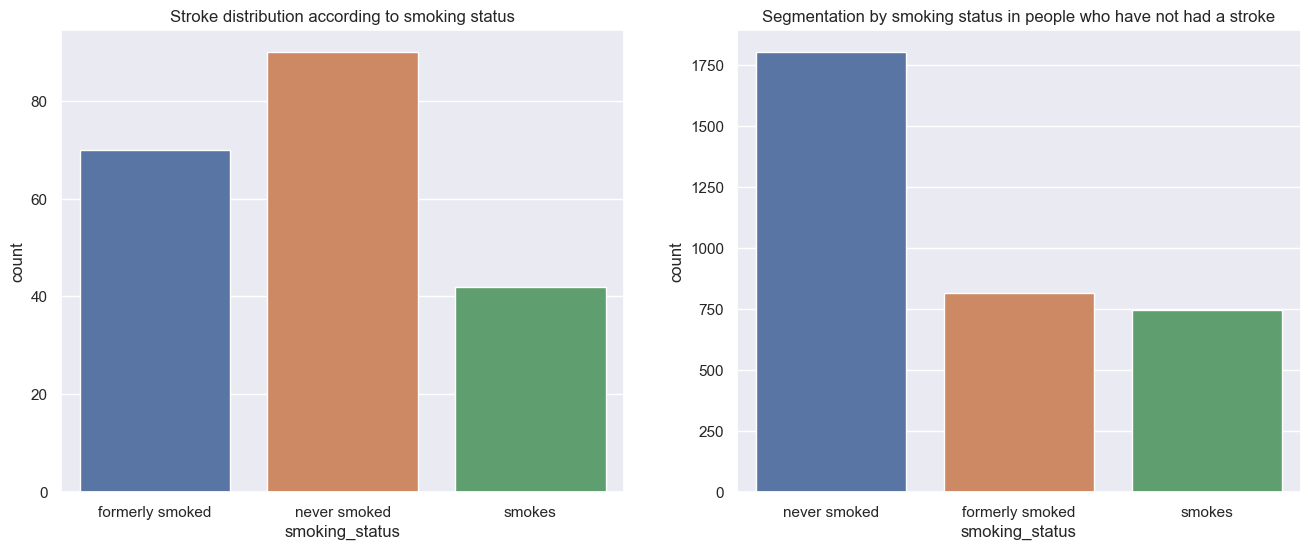

In [320]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.countplot(ax=ax[0], data=df[df.stroke == 1], x='smoking_status').set(
    title="Stroke distribution according to smoking status")
sns.countplot(ax=ax[1], data=df[df.stroke == 0], x='smoking_status').set(
    title="Segmentation by smoking status in people who have not had a stroke")
print('The distribution of smoking status in the dataset is:')
print(df['smoking_status'].value_counts())
plt.show()

The distribution of work type in the dataset is:
Private          2284
Self-employed     663
Govt_job          535
children           69
Never_worked       14
Name: work_type, dtype: int64


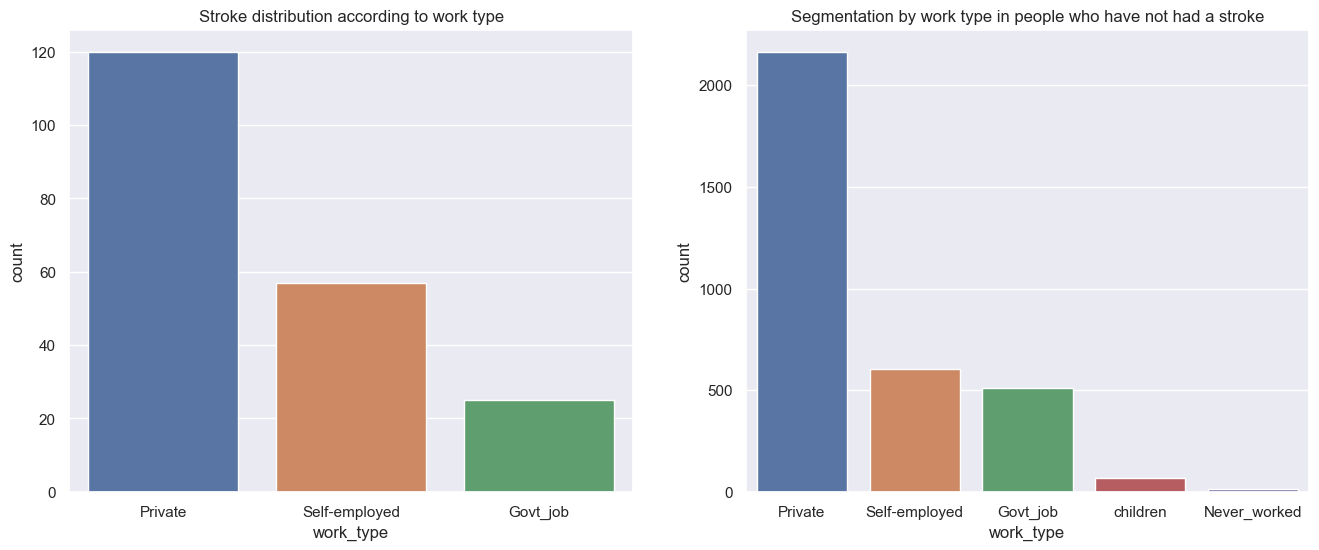

In [321]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.countplot(ax=ax[0], data=df[df.stroke == 1], x='work_type').set(
    title="Stroke distribution according to work type")
sns.countplot(ax=ax[1], data=df[df.stroke == 0], x='work_type').set(
    title="Segmentation by work type in people who have not had a stroke")
print('The distribution of work type in the dataset is:')
print(df['work_type'].value_counts())
plt.show()

Urban    1814
Rural    1751
Name: Residence_type, dtype: int64


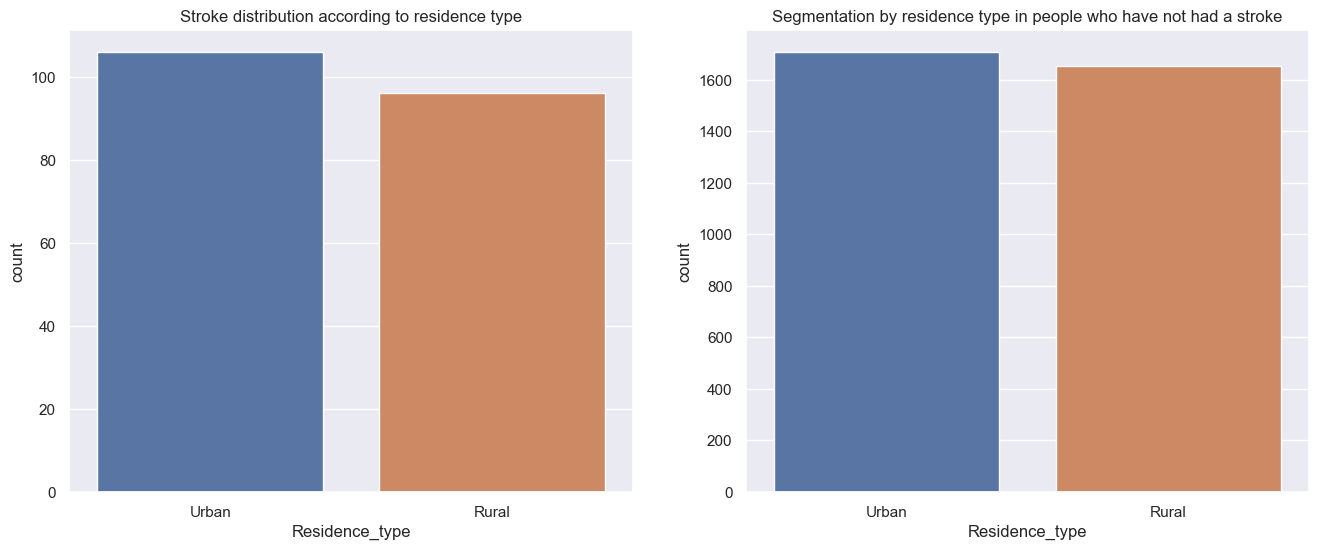

In [322]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

sns.countplot(ax=ax[0], data=df[df.stroke == 1], x='Residence_type').set(
    title="Stroke distribution according to residence type")
sns.countplot(ax=ax[1], data=df[df.stroke == 0], x='Residence_type').set(
    title="Segmentation by residence type in people who have not had a stroke")
print(df['Residence_type'].value_counts())
plt.show()

The avg glucose level is: 108.97237587657749


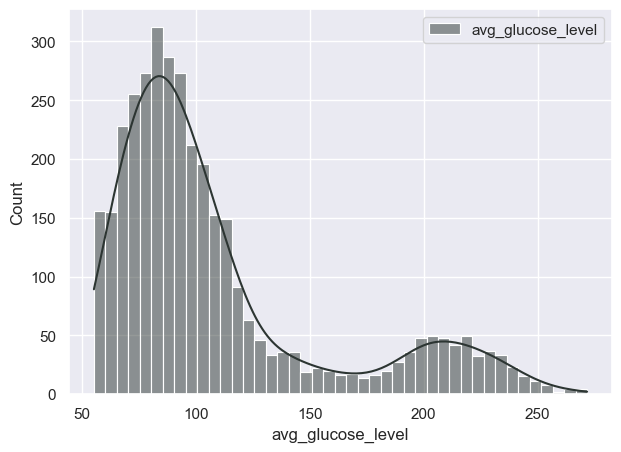

In [323]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(7,5))
sns.histplot(df['avg_glucose_level'], color="#2C3532", label="avg_glucose_level", kde= True)
plt.legend()
print("The avg glucose level is:",df['avg_glucose_level'].mean())

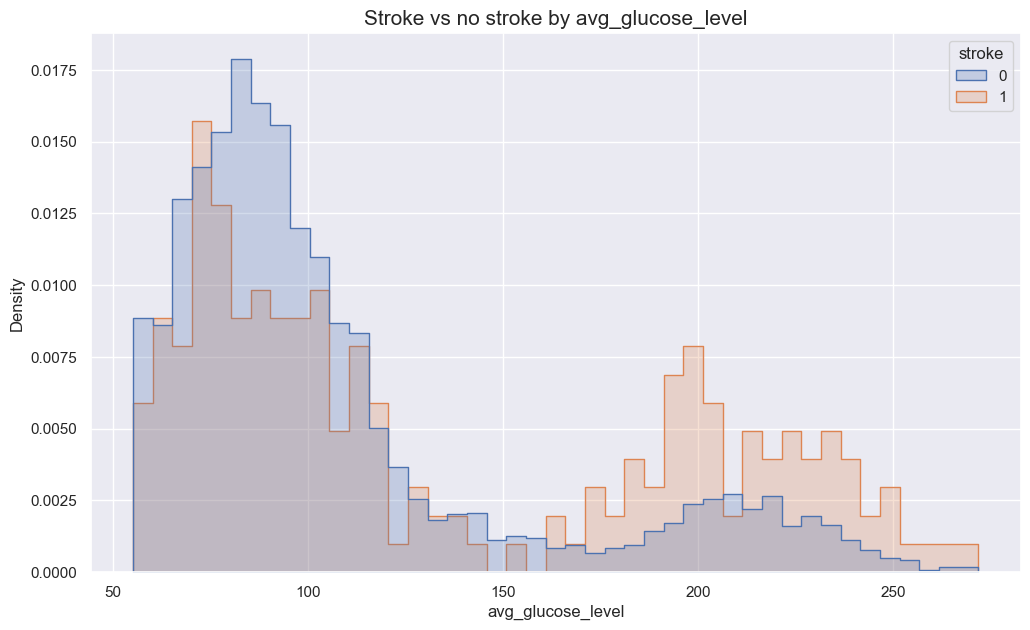

In [324]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="avg_glucose_level", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by avg_glucose_level', fontsize=15)
plt.show()

The density of people having glucose level less than 100 suffered stroke more.

The avg bmi is: 30.237592697143555


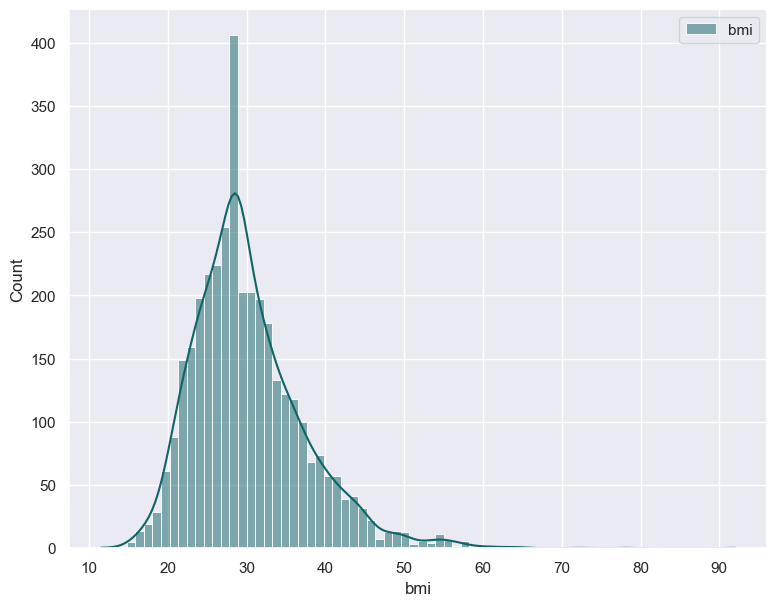

In [325]:
fig = plt.figure(figsize=(9,7))
sns.histplot(df['bmi'], color="#0F6466", label="bmi", kde= True)
plt.legend()
print("The avg bmi is:", df['bmi'].mean())

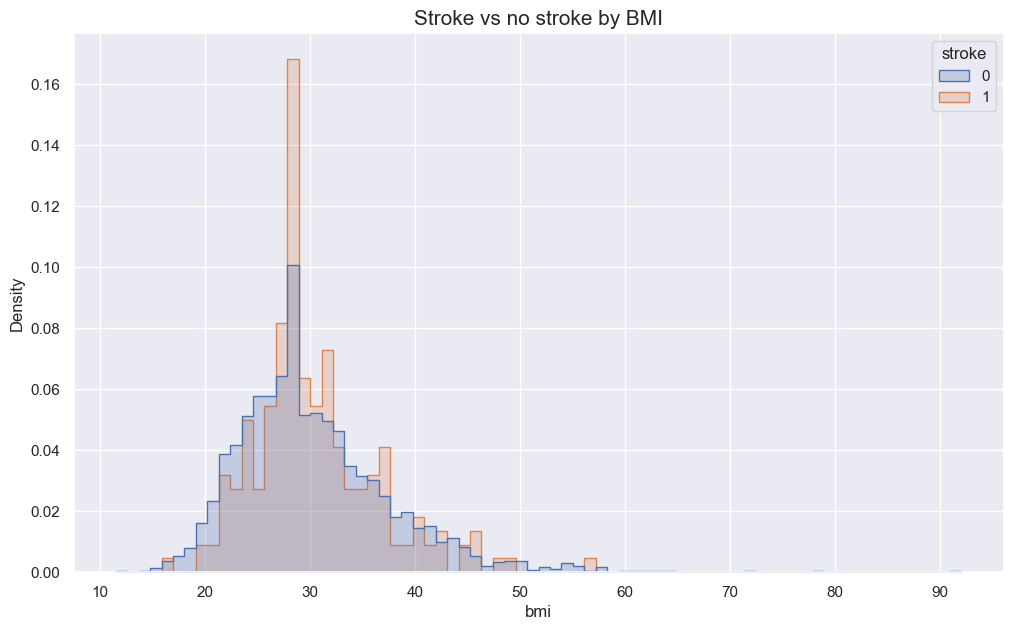

In [326]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="bmi", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

The density of overweight people who suffered a stroke is higher.

The avg age is: 48.86030855539972


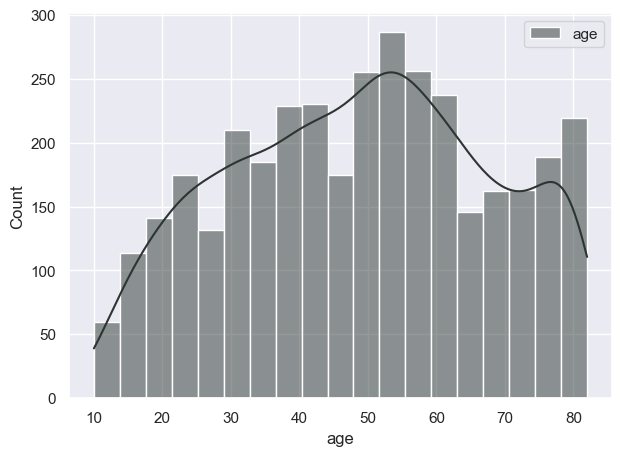

In [327]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(7,5))
sns.histplot(df['age'], color="#2C3532", label="age", kde= True)
plt.legend()
print("The avg age is:",df['age'].mean())

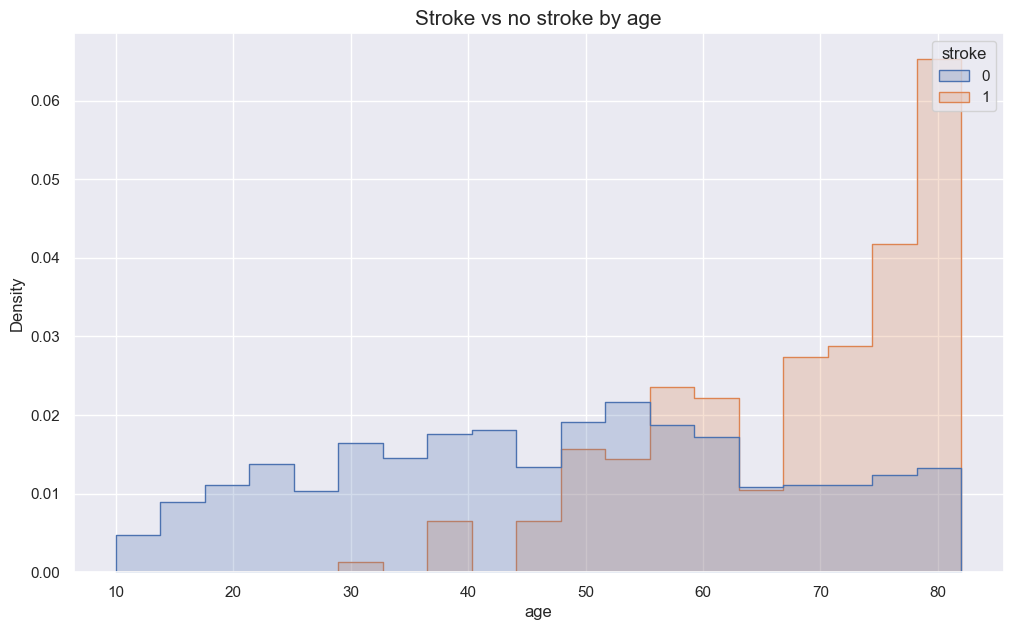

In [328]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="age", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by age', fontsize=15)
plt.show()

The density of people over the age of 50 who have had a stroke is higher